# ANALYSE DES DONNEES RECUES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Importation du fichier

In [3]:
file_dir20 = '../script/dataset_position_scenario_1_prof_20.csv'
file_dir30 = '../script/dataset_position_scenario_1_prof_30.csv'

col_names = ['date','id', 'humidity', 'temperature', 'soil_humidity', 'send_power', 'sf', 'rx_timestamp', 'rssi', 'snr', 'sfrx', 'sftx', 'tx_trials', 'tx_power', 'tx_time_on_air', 'tx_counter', 'tx_frequency', 'prof', 'dist', 'obstacle']

df20 = pd.read_csv(file_dir20, sep=';', header=None, names=col_names)
df30 = pd.read_csv(file_dir30, sep=';', header=None, names=col_names)

In [4]:
df20.head()

,date,id,humidity,temperature,soil_humidity,send_power,sf,rx_timestamp,rssi,snr,sfrx,sftx,tx_trials,tx_power,tx_time_on_air,tx_counter,tx_frequency,prof,dist,obstacle
0,2024-07-02 09:08:35.157782,51,H=63,T=31,Hs=35.19772,sp=20,sf=7,rx_timestamp=27831232,rssi=-100,snr=4.0,sfrx=7,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0,prof=10,dist=10,obst=0
1,2024-07-02 09:08:57.138779,52,H=63,T=31,Hs=35.19772,sp=20,sf=12,rx_timestamp=50872300,rssi=-99,snr=5.0,sfrx=12,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0,prof=10,dist=10,obst=0
2,2024-07-02 09:09:17.712780,53,H=60,T=33,Hs=34.7346,sp=2,sf=7,rx_timestamp=71121294,rssi=-116,snr=-6.0,sfrx=7,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0,prof=10,dist=10,obst=0
3,2024-07-02 09:09:39.636362,54,H=60,T=33,Hs=34.7346,sp=2,sf=12,rx_timestamp=94004655,rssi=-115,snr=-4.0,sfrx=12,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0,prof=10,dist=10,obst=0
4,2024-07-02 09:09:58.585750,55,H=60,T=33,Hs=34.7346,sp=20,sf=7,rx_timestamp=113357392,rssi=-100,snr=5.0,sfrx=7,sftx=0,tx_trials=0,tx_power=14,tx_time_on_air=0,tx_counter=0,tx_frequency=0,prof=10,dist=10,obst=0


In [5]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1091 non-null   object
 1   id              1091 non-null   int64 
 2   humidity        1091 non-null   object
 3   temperature     1091 non-null   object
 4   soil_humidity   1091 non-null   object
 5   send_power      1091 non-null   object
 6   sf              1091 non-null   object
 7   rx_timestamp    1091 non-null   object
 8   rssi            1091 non-null   object
 9   snr             1091 non-null   object
 10  sfrx            1091 non-null   object
 11  sftx            1091 non-null   object
 12  tx_trials       1091 non-null   object
 13  tx_power        1091 non-null   object
 14  tx_time_on_air  1091 non-null   object
 15  tx_counter      1091 non-null   object
 16  tx_frequency    1091 non-null   object
 17  prof            1091 non-null   object
 18  dist    

#### Nettoyage des données
Afin d'avoir uniquement des valeurs dans les cellules

In [6]:
def clean_data(df):
    df['humidity'] = np.int64(df['humidity'].apply(lambda x: str.replace(x, 'H=', '')))

    df['temperature'] = np.int64(df['temperature'].apply(lambda x: str.replace(x, 'T=', '')))

    df['soil_humidity'] = np.float64(df['soil_humidity'].apply(lambda x: str.replace(x, 'Hs=', '')))

    df['send_power'] = np.int64(df['send_power'].apply(lambda x: str.replace(x, 'sp=', '')))

    df['sf'] = np.int64(df['sf'].apply(lambda x: str.replace(x, 'sf=', '')))

    df['rx_timestamp'] = np.int64(df['rx_timestamp'].apply(lambda x: str.replace(x, 'rx_timestamp=', '')))

    df['rssi'] = np.int64(df['rssi'].apply(lambda x: str.replace(x, 'rssi=', '')))

    df['snr'] = np.float64(df['snr'].apply(lambda x: str.replace(x, 'snr=', '')))

    df['sfrx'] = np.int64(df['sfrx'].apply(lambda x: str.replace(x, 'sfrx=', '')))

    df['sftx'] = np.int64(df['sftx'].apply(lambda x: str.replace(x, 'sftx=', '')))

    df['tx_trials'] = np.int64(df['tx_trials'].apply(lambda x: str.replace(x, 'tx_trials=', '')))

    df['tx_power'] = np.int64(df['tx_power'].apply(lambda x: str.replace(x, 'tx_power=', '')))

    df['tx_time_on_air'] = np.int64(df['tx_time_on_air'].apply(lambda x: str.replace(x, 'tx_time_on_air=', '')))

    df['tx_counter'] = np.int64(df['tx_counter'].apply(lambda x: str.replace(x, 'tx_counter=', '')))

    df['tx_frequency'] = np.int64(df['tx_frequency'].apply(lambda x: str.replace(x, 'tx_frequency=', '')))

    return df

#### get_index_from_packet_id(): function that return the dataframe index according to a given packet id

In [7]:
def idp(df, id): # alias of get_index_from_packet_id()
    result = df['id'] == id
    for i in range(0, len(result)):
        if result[i] == True:
            return i
        
    return -1

In [8]:
df20 = clean_data(df20)
df30 = clean_data(df30)

df20.head()

,date,id,humidity,temperature,soil_humidity,send_power,sf,rx_timestamp,rssi,snr,sfrx,sftx,tx_trials,tx_power,tx_time_on_air,tx_counter,tx_frequency,prof,dist,obstacle
0,2024-07-02 09:08:35.157782,51,63,31,35.19772,20,7,27831232,-100,4.0,7,0,0,14,0,0,0,prof=10,dist=10,obst=0
1,2024-07-02 09:08:57.138779,52,63,31,35.19772,20,12,50872300,-99,5.0,12,0,0,14,0,0,0,prof=10,dist=10,obst=0
2,2024-07-02 09:09:17.712780,53,60,33,34.73460,2,7,71121294,-116,-6.0,7,0,0,14,0,0,0,prof=10,dist=10,obst=0
3,2024-07-02 09:09:39.636362,54,60,33,34.73460,2,12,94004655,-115,-4.0,12,0,0,14,0,0,0,prof=10,dist=10,obst=0
4,2024-07-02 09:09:58.585750,55,60,33,34.73460,20,7,113357392,-100,5.0,7,0,0,14,0,0,0,prof=10,dist=10,obst=0


In [9]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1091 non-null   object 
 1   id              1091 non-null   int64  
 2   humidity        1091 non-null   int64  
 3   temperature     1091 non-null   int64  
 4   soil_humidity   1091 non-null   float64
 5   send_power      1091 non-null   int64  
 6   sf              1091 non-null   int64  
 7   rx_timestamp    1091 non-null   int64  
 8   rssi            1091 non-null   int64  
 9   snr             1091 non-null   float64
 10  sfrx            1091 non-null   int64  
 11  sftx            1091 non-null   int64  
 12  tx_trials       1091 non-null   int64  
 13  tx_power        1091 non-null   int64  
 14  tx_time_on_air  1091 non-null   int64  
 15  tx_counter      1091 non-null   int64  
 16  tx_frequency    1091 non-null   int64  
 17  prof            1091 non-null   o

#### Desciption des donnees

In [10]:
df20.describe()

,id,humidity,temperature,soil_humidity,send_power,sf,rx_timestamp,rssi,snr,sfrx,sftx,tx_trials,tx_power,tx_time_on_air,tx_counter,tx_frequency
count,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1091.000000,1.091000e+03,1091.000000,1091.000000,1091.000000,1091.0,1091.0,1091.0,1091.0,1091.0,1091.0
mean,684.495875,42.854262,37.451879,23.484664,11.041247,9.520623,2.118831e+09,-89.622365,4.924840,9.520623,0.0,0.0,14.0,0.0,0.0,0.0
std,355.262860,16.705650,5.976730,5.378448,9.004033,2.501061,1.257869e+09,23.285669,3.030705,2.501061,0.0,0.0,0.0,0.0,0.0,0.0
min,51.000000,24.000000,20.000000,10.402570,2.000000,7.000000,3.083591e+06,-126.000000,-12.000000,7.000000,0.0,0.0,14.0,0.0,0.0,0.0
25%,383.500000,33.000000,36.000000,21.090130,2.000000,7.000000,1.021739e+09,-105.000000,3.000000,7.000000,0.0,0.0,14.0,0.0,0.0,0.0
50%,694.000000,37.000000,40.000000,22.515140,20.000000,12.000000,2.102369e+09,-96.000000,6.000000,12.000000,0.0,0.0,14.0,0.0,0.0,0.0
75%,994.500000,45.000000,41.000000,25.151405,20.000000,12.000000,3.232439e+09,-87.000000,7.000000,12.000000,0.0,0.0,14.0,0.0,0.0,0.0
max,1292.000000,95.000000,45.000000,47.274680,20.000000,12.000000,4.293905e+09,-32.000000,10.000000,12.000000,0.0,0.0,14.0,0.0,0.0,0.0


### Visualisation des parametres reseaux

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
print(idp(df30, 465))
print(idp(df30, 665))

360
-1


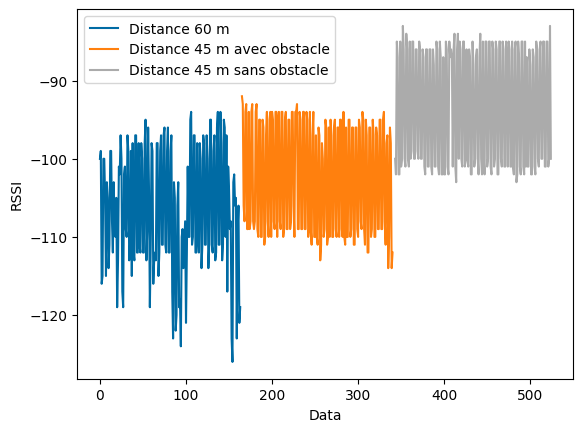

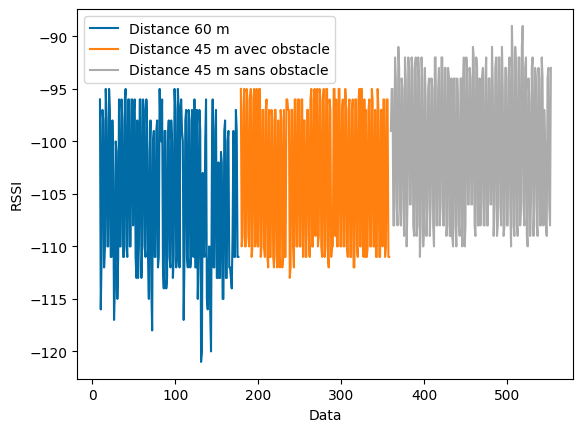

In [13]:
#plt.style.use('seaborn-v0_8-colorblind')
#plt.style.use('seaborn-v0_8-dark-palette')
#plt.style.use('seaborn-v0_8-paper')

plt.style.use('tableau-colorblind10')
plt.plot(df20['rssi'][idp(df20, 51):idp(df20, 251)], label='Distance 60 m')
plt.plot(df20['rssi'][idp(df20, 259):idp(df20, 459)], label='Distance 45 m avec obstacle')
plt.plot(df20['rssi'][idp(df20, 461):idp(df20, 662)], label='Distance 45 m sans obstacle')

plt.xlabel('Data')
plt.ylabel('RSSI')
plt.legend()

plt.show()

plt.style.use('tableau-colorblind10')
plt.plot(df30['rssi'][idp(df30, 32):idp(df30, 219)], label='Distance 60 m')
plt.plot(df30['rssi'][idp(df30, 248):idp(df30, 447)], label='Distance 45 m avec obstacle')
plt.plot(df30['rssi'][idp(df30, 465):idp(df30, 664)], label='Distance 45 m sans obstacle')

plt.xlabel('Data')
plt.ylabel('RSSI')
plt.legend()

plt.show()


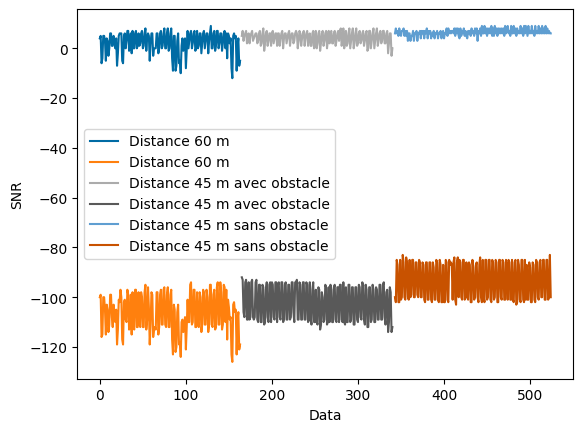

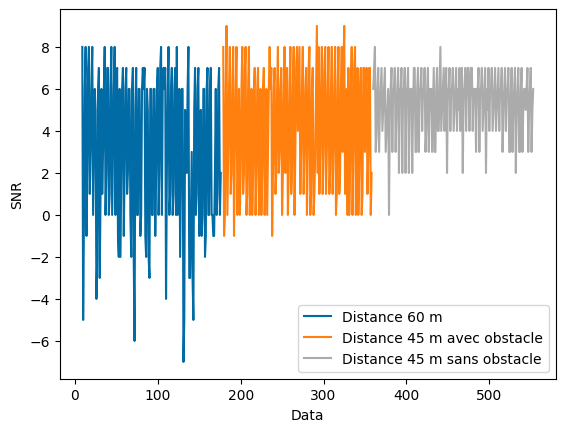

In [19]:
#plt.style.use('seaborn-v0_8-colorblind')
#plt.style.use('seaborn-v0_8-dark-palette')
#plt.style.use('seaborn-v0_8-paper')

plt.style.use('tableau-colorblind10')
plt.plot(df20['snr'][idp(df20, 51):idp(df20, 251)], label='Distance 60 m')
plt.plot(df20['rssi'][idp(df20, 51):idp(df20, 251)], label='Distance 60 m')
plt.plot(df20['snr'][idp(df20, 259):idp(df20, 459)], label='Distance 45 m avec obstacle')
plt.plot(df20['rssi'][idp(df20, 259):idp(df20, 459)], label='Distance 45 m avec obstacle')
plt.plot(df20['snr'][idp(df20, 461):idp(df20, 662)], label='Distance 45 m sans obstacle')
plt.plot(df20['rssi'][idp(df20, 461):idp(df20, 662)], label='Distance 45 m sans obstacle')

plt.xlabel('Data')
plt.ylabel('SNR')
plt.legend()

plt.show()

plt.style.use('tableau-colorblind10')
plt.plot(df30['snr'][idp(df30, 32):idp(df30, 219)], label='Distance 60 m')
plt.plot(df30['snr'][idp(df30, 248):idp(df30, 447)], label='Distance 45 m avec obstacle')
plt.plot(df30['snr'][idp(df30, 465):idp(df30, 664)], label='Distance 45 m sans obstacle')

plt.xlabel('Data')
plt.ylabel('SNR')
plt.legend()

plt.show()

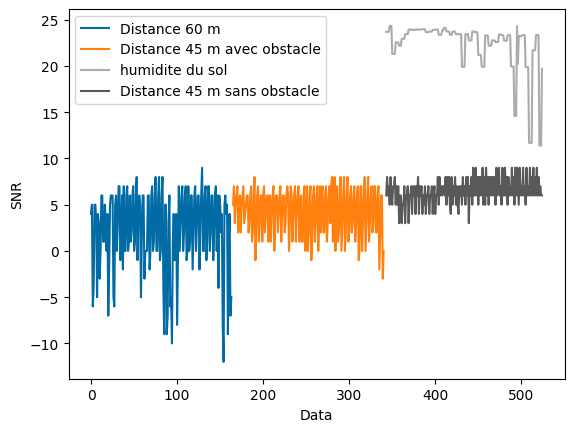

C:\Users\Prosper\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


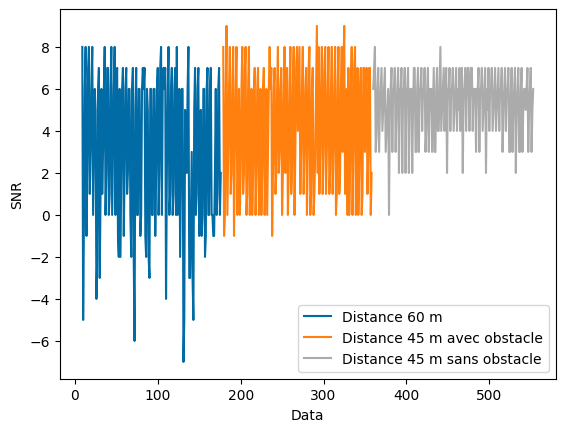

In [17]:
#plt.style.use('seaborn-v0_8-colorblind')
#plt.style.use('seaborn-v0_8-dark-palette')
#plt.style.use('seaborn-v0_8-paper')

plt.style.use('tableau-colorblind10')
plt.plot(df20['snr'][idp(df20, 51):idp(df20, 251)], label='Distance 60 m')
plt.plot(df20['snr'][idp(df20, 259):idp(df20, 459)], label='Distance 45 m avec obstacle')
plt.plot(df20['soil_humidity'][idp(df20, 461):idp(df20, 662)], label='humidite du sol')
plt.plot(df20['snr'][idp(df20, 461):idp(df20, 662)], label='Distance 45 m sans obstacle')

plt.xlabel('Data')
plt.ylabel('SNR')
plt.legend()

plt.show()

plt.style.use('tableau-colorblind10')
plt.plot(df30['snr'][idp(df30, 32):idp(df30, 219)], label='Distance 60 m')
plt.plot(df30['snr'][idp(df30, 248):idp(df30, 447)], label='Distance 45 m avec obstacle')
plt.plot(df30['snr'][idp(df30, 465):idp(df30, 664)], label='Distance 45 m sans obstacle')

plt.xlabel('Data')
plt.ylabel('SNR')
plt.legend()

plt.show()

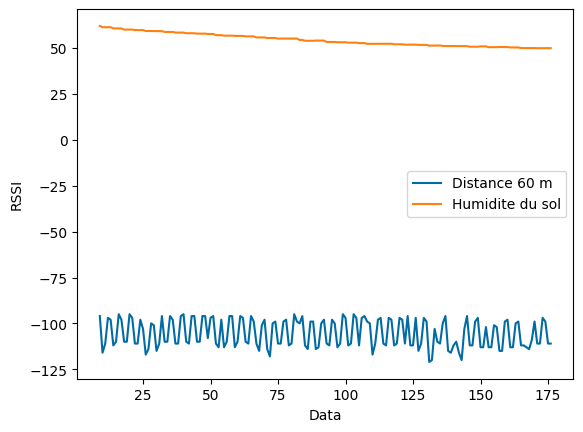

In [20]:
#plt.style.use('seaborn-v0_8-colorblind')
#plt.style.use('seaborn-v0_8-dark-palette')
#plt.style.use('seaborn-v0_8-paper')

plt.style.use('tableau-colorblind10')
plt.plot(df30['rssi'][idp(df30, 32):idp(df30, 219)], label='Distance 60 m')
plt.plot(df30['soil_humidity'][idp(df30, 32):idp(df30, 219)], label='Humidite du sol')

plt.xlabel('Data')
plt.ylabel('RSSI')
plt.legend()

plt.show()